<a href="https://colab.research.google.com/github/x-state7/HandsOnMachineLearning-book/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
def load_housing_data(housing_path):
  return pd.read_csv(housing_path)

In [ ]:
path="drive/MyDrive/Colab Notebooks/datasets/housing.csv"
housing=load_housing_data(path)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# info() method is useful to get a quick description of the data,
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# values in the ocean_proximity column were repetitive,
# which means that it is probably a categorical attribute.
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


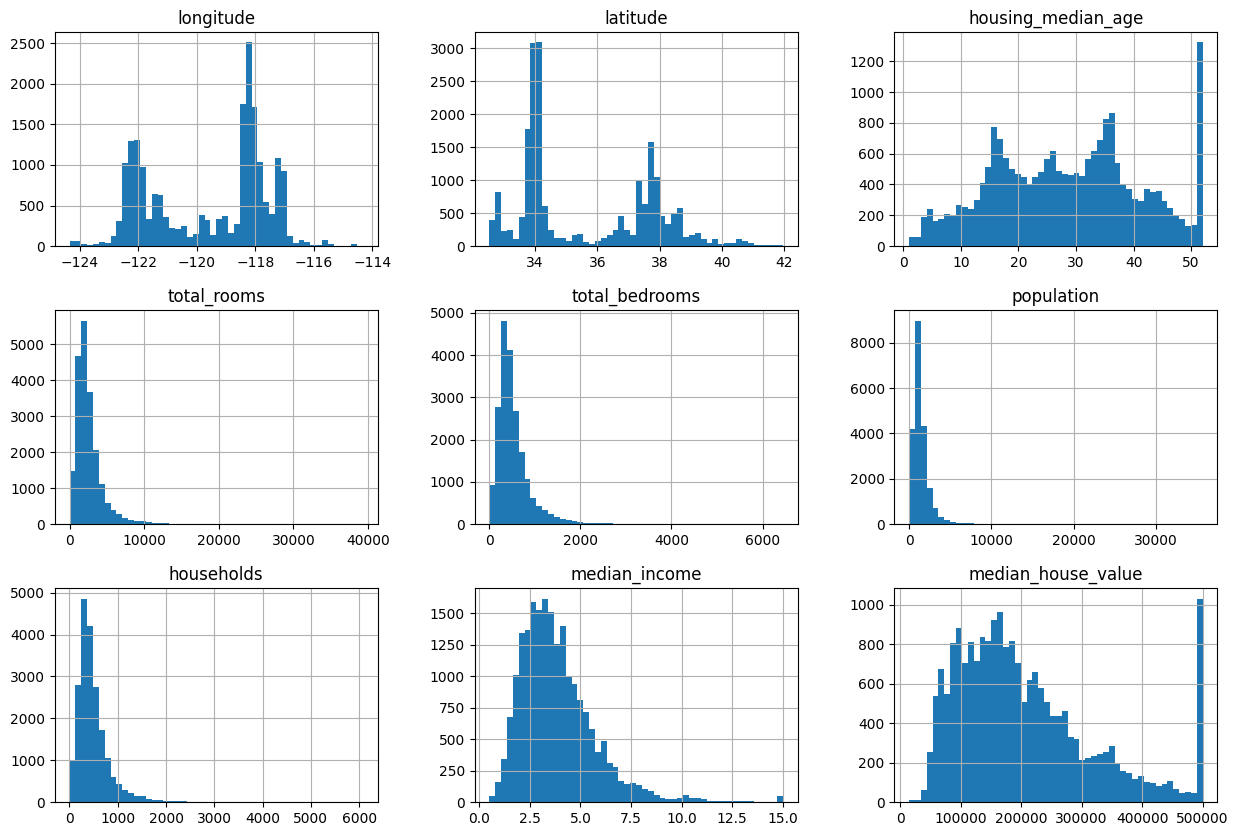

In [ ]:
# plotting histogram to get mroe clear picture
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(15,10))
plt.show()

splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
# test_size:split the dataset by ratio, in our case it takes 20% dataset as test set and 80% as train set
# random_state means how randomly the next data will split from the previous one

**Avoiding sampling bias**

we uses the pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:



In [ ]:
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5])


<Axes: >

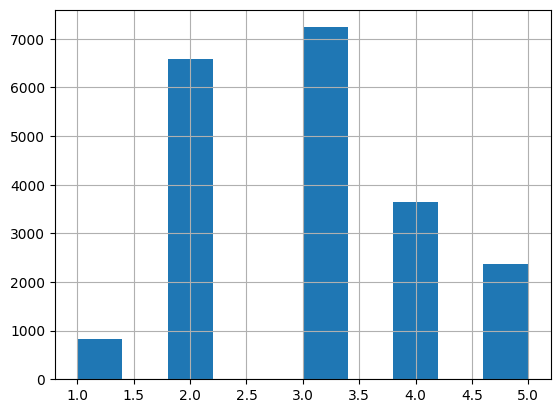

In [ ]:
housing["income_cat"].hist()

now we will do stratified sampling based on income category so that test set is representative of the overall population

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [ ]:
  strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
# for set_ in (strat_train_Set,strat_test_set):
#   set_.drop("income_cat",axis=1,inplace=True)

##**EXPLORING THE DATA**

In [ ]:
# creating a copy of the dataset so we dont ruin our trainning set
housing=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

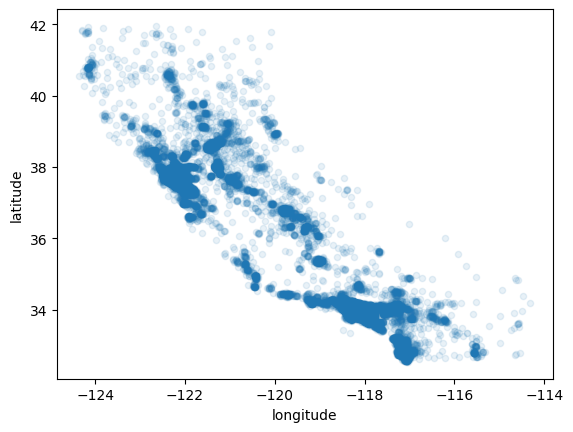

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

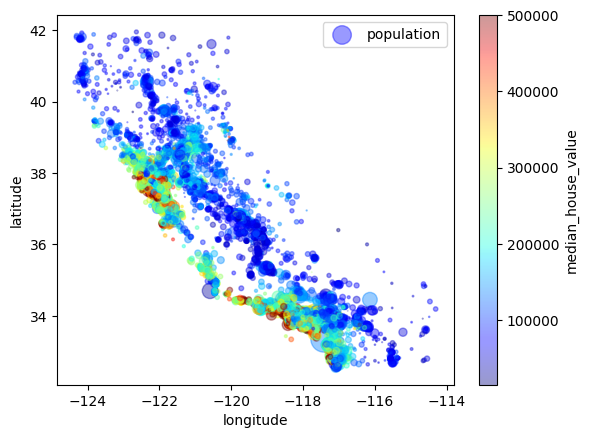

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,
             label="population",fig=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

## **Prepare the Data for Machine Learning Algorithms**

In [ ]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

###Data Cleaning

In [ ]:
# using simple imputer for easy purpose
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1)#median can only be computed on numerical attribute
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [ ]:
# Now you can use this “trained” imputer to transform the training set by replacing
# missing values by the learned medians:
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns)

Handling Text and Categorical Attributes

In [ ]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

###CREATING PIPELINE

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


Feature Scaling

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),#fills missing values in the data with the median of each feature.
    ('attribs_adder',CombinedAttributesAdder()),#custom transformer
    ('std_scalar',StandardScaler()),#tandardizes the features by removing the mean and scaling to unit variance.
    ])

housing_num_tr=num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20,Scikit-Learn introduced the ColumnTransformer for this purpose, and the good newsis that it works great with Pandas DataFrames.

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model

### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [ ]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("predictions:",lin_reg.predict(some_data_prepared))

predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]


In [ ]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)


In [ ]:
lin_rmse

68376.51254853733

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("scores:",scores)
  print("mean:",scores.mean())
  print("Standard Deviation:",scores.std())

In [ ]:
display_scores(tree_rmse_scores)

scores: [72544.76538596 69634.60323166 69112.03384514 73251.30054836
 69996.13472699 76675.82614892 72539.57756668 73151.87531806
 68918.78374346 72257.01649741]
mean: 71808.19170126393
Standard Deviation: 2290.999924539758


In [ ]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,
                           scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [ ]:
display_scores(lin_rmse_scores)

scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
mean: 68897.63006613276
Standard Deviation: 3002.746127534861


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [ ]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_rmse_scores)

scores: [51055.18079602 48947.40022635 46868.2133782  51738.16936938
 47529.59050946 52006.05970636 52356.29376027 49862.27230941
 48585.37703737 53985.36153447]
mean: 50293.39186272795
Standard Deviation: 2185.6911408162155


# Fine-Tune Your Model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
   print(np.sqrt(-mean_score),params)

64087.98471365356 {'max_features': 2, 'n_estimators': 3}
55760.85556010862 {'max_features': 2, 'n_estimators': 10}
53092.99742057397 {'max_features': 2, 'n_estimators': 30}
60922.018496026416 {'max_features': 4, 'n_estimators': 3}
53379.53939047909 {'max_features': 4, 'n_estimators': 10}
51099.58774622637 {'max_features': 4, 'n_estimators': 30}
60146.650847611694 {'max_features': 6, 'n_estimators': 3}
53334.46194843147 {'max_features': 6, 'n_estimators': 10}
50833.68009177108 {'max_features': 6, 'n_estimators': 30}
59221.02798647074 {'max_features': 8, 'n_estimators': 3}
53342.62979278667 {'max_features': 8, 'n_estimators': 10}
50707.11575272762 {'max_features': 8, 'n_estimators': 30}
62081.841771512765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54178.4520246934 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60075.77595036949 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53461.443388869135 {'bootstrap': False, 'max_features': 3, 'n_estimators':

#### Analyze the Best Models and Their Errors

In [ ]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.53739209e-02, 5.89509255e-02, 4.52757139e-02, 1.64629265e-02,
       1.52945239e-02, 1.59492507e-02, 1.58200321e-02, 2.75912842e-01,
       1.56700207e-01, 4.06398888e-02, 1.03879628e-01, 3.76394389e-02,
       6.93645837e-03, 1.40201941e-01, 1.16752711e-04, 1.87374594e-03,
       2.97180413e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.27591284152355344, 'median_income'),
 (0.15670020716838, 'income_cat'),
 (0.14020194065615676, 'INLAND'),
 (0.10387962819551617, 'pop_per_hhold'),
 (0.0653739209052103, 'longitude'),
 (0.058950925541859024, 'latitude'),
 (0.045275713911453026, 'housing_median_age'),
 (0.04063988880875501, 'rooms_per_hhold'),
 (0.037639438901713146, 'bedrooms_per_room'),
 (0.016462926492444557, 'total_rooms'),
 (0.015949250745329758, 'population'),
 (0.01582003212427499, 'households'),
 (0.015294523881520056, 'total_bedrooms'),
 (0.006936458370501953, '<1H OCEAN'),
 (0.00297180412588587, 'NEAR OCEAN'),
 (0.0018737459361171558, 'NEAR BAY'),
 (0.00011675271132887869, 'ISLAND')]

In [ ]:
# Evaluating System on the Test Set
final_model=grid_search.best_estimator_
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()
X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [ ]:
final_rmse

48509.116473774826

In [ ]:

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46478.30572634, 50458.25858015])